# Proyek Analisis Data: Bike Sharing
- **Nama:** Lailatul Aisyah
- **Email:** aisha.raira@gmail.com
- **ID Dicoding:** B25B9D048

## Menentukan Pertanyaan Bisnis

1. Kapan waktu paling populer untuk penggunaan sepeda (berdasarkan jam dan musim)?
2. Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda dalam satu tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [5]:
# Load data
day_df = pd.read_csv("\Submission\data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('\Submission\data\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terdiri dari data harian (day.csv) dan per jam (hour.csv), memungkinkan analisis tren jangka panjang dan perilaku pengguna harian.

- File berhasil dimuat tanpa error, menunjukkan format sudah sesuai dan struktur folder rapi untuk kelancaran proses analisis selanjutnya.

### Assessing Data

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data konsisten dan lengkap. Tidak ditemukan missing values atau duplikasi, menandakan kualitas data cukup baik untuk analisis lanjutan.
- Keterkaitan fitur dengan target, setiap kolom saling berkaitan menjelaskan variasi jumlah peminjaman.


### Cleaning Data

In [13]:
# Mengubah tipe data menjadi kategori
kategori_kolom = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in kategori_kolom:
    if col in day_df.columns:
        day_df[col] = day_df[col].astype('category')
    if col in hour_df.columns:
        hour_df[col] = hour_df[col].astype('category')

In [ ]:
# Menangani missing value
day_df.isna().sum()
hour_df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Mengubah kolom seperti season, mnth, weekday menjadi category menghemat memori dan mempercepat pengeompokkan.
- Memanggil isna().sum() memastikan status nilai hilang. Jika hasilnya nol maka preprocessing minimal; jika ada, tentukan strategi imputasi atau penghapusan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [21]:
day_df.groupby("season").agg({
    "cnt": "mean",
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "cnt": ["count", "mean", "std"]
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2024\1278372499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("season").agg({


cnt                                temp       hum windspeed
       count         mean          std      mean      mean      mean
season                                                              
1        181  2604.132597  1399.942119  0.297748  0.582903  0.214537
2        184  4992.331522  1695.977235  0.544405  0.626948  0.203507
3        188  5644.303191  1459.800381  0.706309  0.633482  0.172095
4        178  4728.162921  1699.615261  0.422906  0.668719  0.171995

In [ ]:
# Total peminjaman per weekday
day_df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2024\2413455795.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)


weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

In [ ]:
# Tampilkan ringkasan statistik
day_df.describe(include='all')
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4.0,2.0,12.0,NaN,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,3.0,1.0,7.0,NaN,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Musim berpengaruh: rata‑rata _cnt_ dan _temp_ berbeda antar season.
- Beberapa weekday menunjukkan total peminjaman jauh lebih tinggi, mengindikasikan hari puncak penggunaan.


## Visualization & Explanatory Analysis

### Pertanyaan 1:
* Kapan waktu paling populer untuk penggunaan sepeda berdasarkan jam dan musim?


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2024\278298928.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_hourly = hour_df.groupby(['hr', 'season'])['cnt'].mean().reset_index()


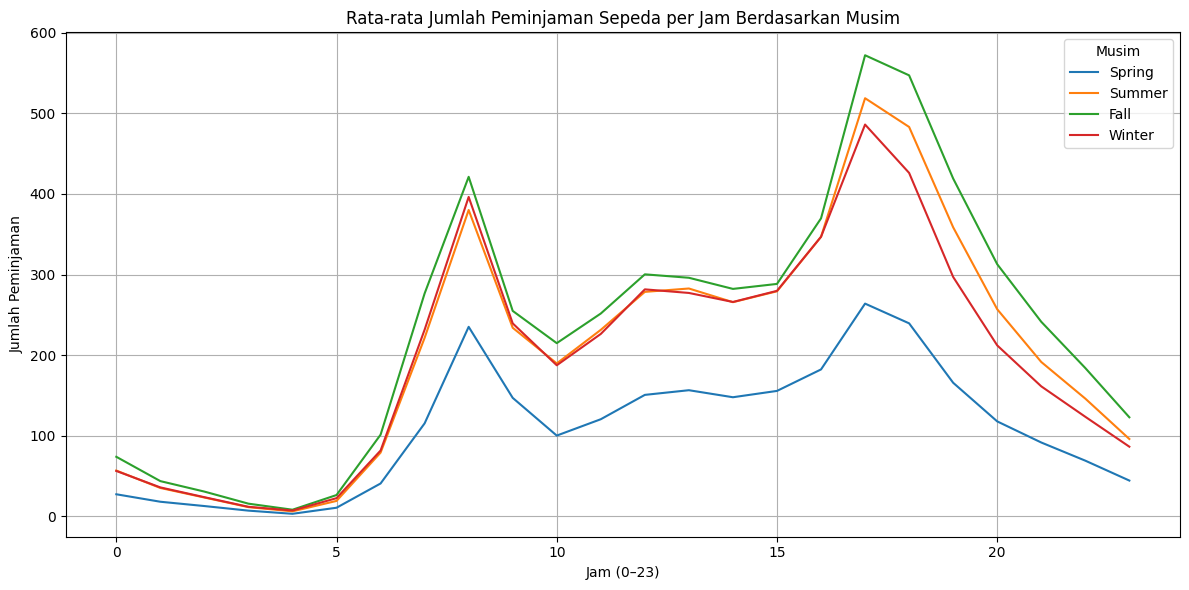

In [32]:
# Mapping nama musim
import matplotlib.pyplot as plt
import seaborn as sns

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].cat.rename_categories(season_labels)

# Hitung rata-rata peminjaman per jam untuk setiap musim
avg_hourly = hour_df.groupby(['hr', 'season'])['cnt'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_hourly, x='hr', y='cnt', hue='season', palette='tab10')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam Berdasarkan Musim')
plt.xlabel('Jam (0–23)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim')
plt.grid(True)
plt.tight_layout()
plt.show()



### Pertanyaan 2
* Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda dalam satu tahun terakhir?


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2024\669830063.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = last_year.groupby(['month', 'weathersit'])['cnt'].mean().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2024\669830063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=last_year, x='weathersit', y='cnt', palette='Set2')


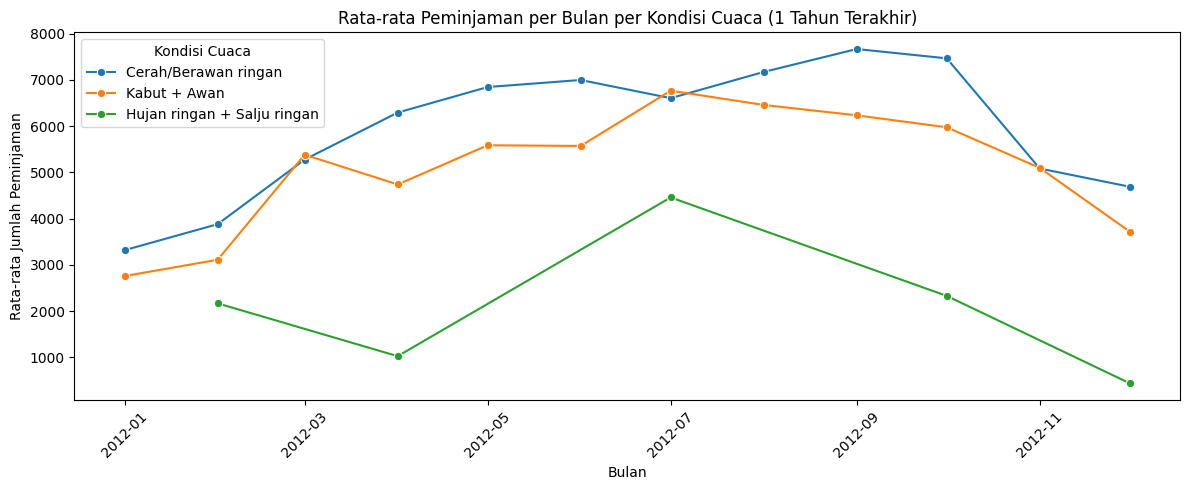

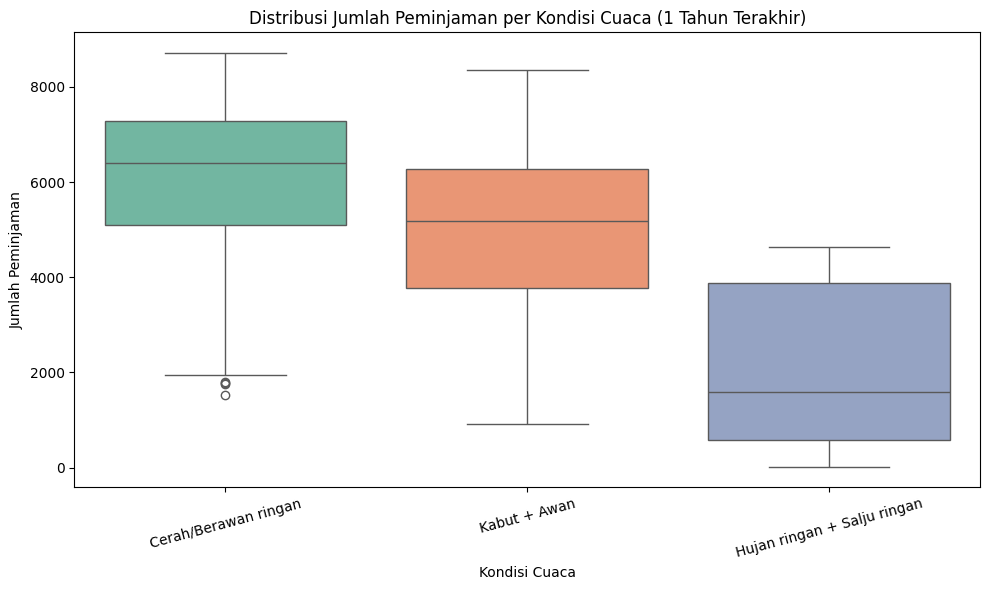

In [34]:
# Pastikan dteday bertipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Filter 1 tahun terakhir berdasarkan tanggal maksimum di dataset
max_date = day_df['dteday'].max()
start_date = max_date - pd.Timedelta(days=365)
last_year = day_df.loc[day_df['dteday'].between(start_date, max_date)].copy()

# Agregasi: rata-rata cnt per bulan dan weathersit
last_year['month'] = last_year['dteday'].dt.to_period('M').dt.to_timestamp()
monthly = last_year.groupby(['month', 'weathersit'])['cnt'].mean().reset_index()

# Plot 1: Lineplot rata-rata bulanan (trend)
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x='month', y='cnt', hue='weathersit', marker='o')
plt.title('Rata‑rata Peminjaman per Bulan per Kondisi Cuaca (1 Tahun Terakhir)')
plt.xlabel('Bulan')
plt.ylabel('Rata‑rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.legend(title='Kondisi Cuaca')
plt.tight_layout()

# Plot 2: Boxplot distribusi harian per kondisi cuaca (1 tahun terakhir)
plt.figure(figsize=(10, 6))
sns.boxplot(data=last_year, x='weathersit', y='cnt', palette='Set2')
plt.title('Distribusi Jumlah Peminjaman per Kondisi Cuaca (1 Tahun Terakhir)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()


## Conclusion

### Conclution Pertanyaan 1
- Penggunaan sepeda paling tinggi terjadi pada jam 07–09 pagi dan 17–19 sore, terutama pada hari kerja.
- Musim gugur (Fall) dan panas (Summer) menunjukkan volume peminjaman tertinggi, kemungkinan karena cuaca yang mendukung dan aktivitas luar ruangan yang meningkat.
- Pola ini menunjukkan bahwa layanan bike sharing sangat dimanfaatkan oleh komuter untuk perjalanan ke dan dari tempat kerja atau sekolah.

### Conclution Pertanyaan 2
- Cuaca cerah atau berawan ringan menghasilkan jumlah peminjaman tertinggi.
- Kondisi kabut, hujan ringan, dan badai secara signifikan menurunkan jumlah peminjaman.
- Ini menunjukkan bahwa cuaca adalah faktor eksternal penting yang memengaruhi perilaku pengguna.